# Statystyczne Metody Przetwarzania Danych

Celem laboratorium jest:
1. obserwacja wpływu czynnika losowego przy podziale zbioru danych na wyniki klasyfikacji,
2. zapoznanie się z tematyką walidacji krzyżowej,
3. implementacja klasyfikatora kNN.

## Wstęp

Aplikacja internetowa https://rsusik.github.io/test/ zawiera implementację dwóch klawiatur `keydrop` oraz `normal` opartych na szablonie zbliżonym do klawiatury `gboard`.


<center><table>
<tr>
    <td><img src="fig_normal.jpg" width="300" /></td>
    <td><img src="fig_keydrop.jpg" width="300" /></td>
</tr>
<tr>
    <td><center>(a) Normal</center></td>
    <td><center>(b) Keydrop</center></td>
</tr>
</table></center>

Jest to aplikacja PWA (Progressive Web Application), czyli strona internetowa otwierana w trybie pełnoekranowym na urządzeniu. Aby z niej skorzystać należy dodać ją (skrót do strony) do ekranu. W tym celu najpierw należy powyższy link otworzyć w przeglądarce, a następnie z menu przeglądarki wybrać "Dodaj do ekranu" bądź "Zainstaluj" (w zależności od przeglądarki).

<table>
<tr>
    <td><img src="fig_install.jpg" width="300" /></td>
    <td><img src="fig_menu.jpg" width="300" /></td>
    <td><img src="fig_download.jpg" width="300" /></td>
</tr>
<tr>
    <td><center>(a) Instalacja</center></td>
    <td><center>(b) Menu</center></td>
    <td><center>(c) Pobieranie wyników</center></td>
</tr>
</table>

Aplikacja stanowi część eksperymentu w którym użytkownik musi przepisać 10 zdań wyświetlonych na ekranie w każdym trybie (`keydrop`, `normal`) w jak najkrótszym tempie, a zebrane w trakcie przepisywania dane umożliwiają odpowiedzieć na pytanie jakie literówki popełniają użytkownicy. Wynikiem eksperymentu jest zatem macierz o wymiarach `(liczba liter x liczba liter)`. 
Przykład:
<img src="fig_typos.png" width="300" />

Na powyższym przykładzie widać, że użytkownik 93 razy błednie wpisał literę `m` zamiast litery `k`.

W ninejszym laboratorium podana macierz będzie używana jako dane na podstawie których będzie przeprowadzana klasyfikacja klawiatury na której pisał użytkownik.


## Zbiór danych

Dany jest zbiór plików `.json` w których zawierają się statystyki będące podstawą do utworzenia wspomnianych wyżej macierzy pomyłek. 

## Zadanie 1
Wykonaj (w wyżej wymienionej aplikacji) po dwa testy dla każdego trybu (`keydrop`, `normal`), wypełnij ankietę, pobierz plik `json` z wynikami i umieść w folderze `my_result`. Plik wyślij także prowadzącemu laboratorium (będzie użyty do powiększenia zbioru danych i użyty w dalszych badaniach).

> Jeżeli nie masz urządzenia na którym mógłbyś wykonać testy to zgłoś to prowadzącemu laboratorium.


## Zadanie 2
Wczytaj zbiór danych za pomocą funkcji `process_data` znajdującej się w pliku `utils.py`.

Funkcja zwraca dwie wartości, gdzie pierwsza zawiera wspomniane wyżej macierze, a druga etykiety.
Ponieważ każdy z uczestników eksperymentu miał za zadanie wykonać test dwukrotnie dla każdego trybu to dane te są uśrednione.

> Podpowiedź: Aby zaimportować funkcję należy wykonać `from utils import process_data`.


In [376]:
from utils import process_data
import numpy as np
example_data, example_labels = process_data('example_results')
example_data = np.array(example_data)
example_labels = np.array(example_labels)

In [377]:
print(example_data.shape)
display(example_data)
print(len(example_labels))
display(example_labels)

(32, 26, 26)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 2., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

32


array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'keydrop', 'keydrop',
       'keydrop', 'keydrop', 'keydrop', 'keydrop', 'keydrop', 'keydrop',
       'keydrop', 'keydrop', 'keydrop', 'keydrop', 'keydrop', 'keydrop',
       'keydrop', 'keydrop'], dtype='<U7')

## Zadanie 3
Wczytaj także swój wynik z folderu `myresult` i wyświetl tablice pomyłek (literówek) dla obu klawiatur za pomocą funkcji `show_matrix` z `utils.py`. Czy zaobserwowałeś różnicę pomiędzy obiema klawiaturami?

> Podpowiedź: `show_matrix(myX[0], myY[0])`

In [378]:
my_data, my_labels = process_data('my_results')
my_data = np.array(my_data)
my_labels = np.array(my_labels)

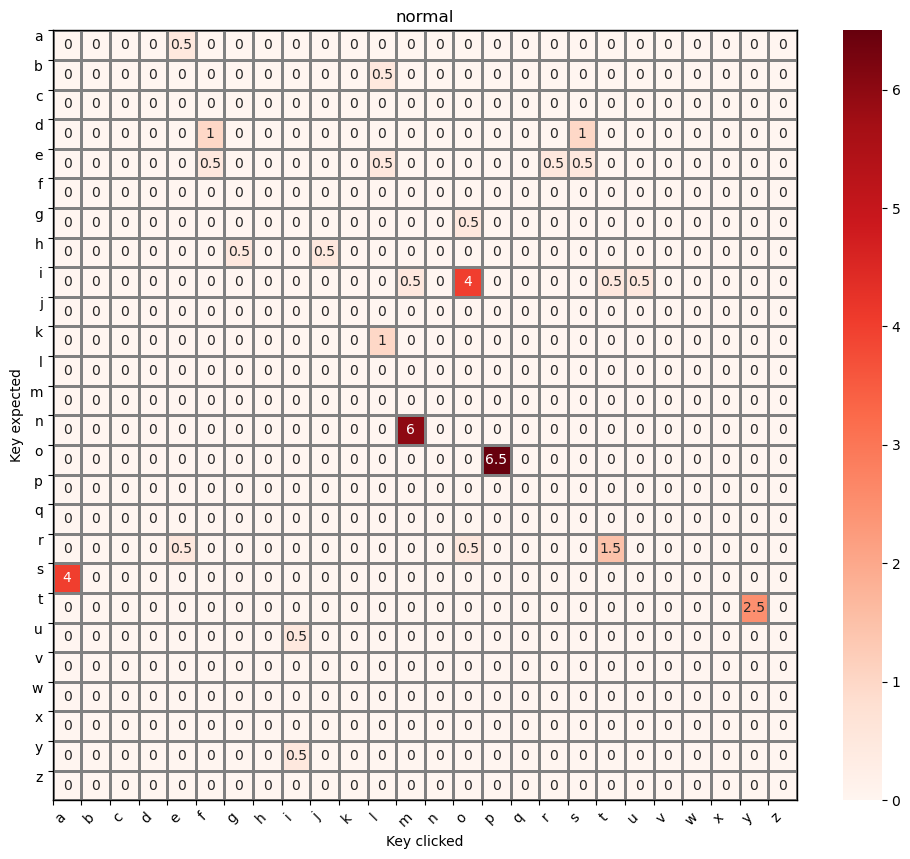

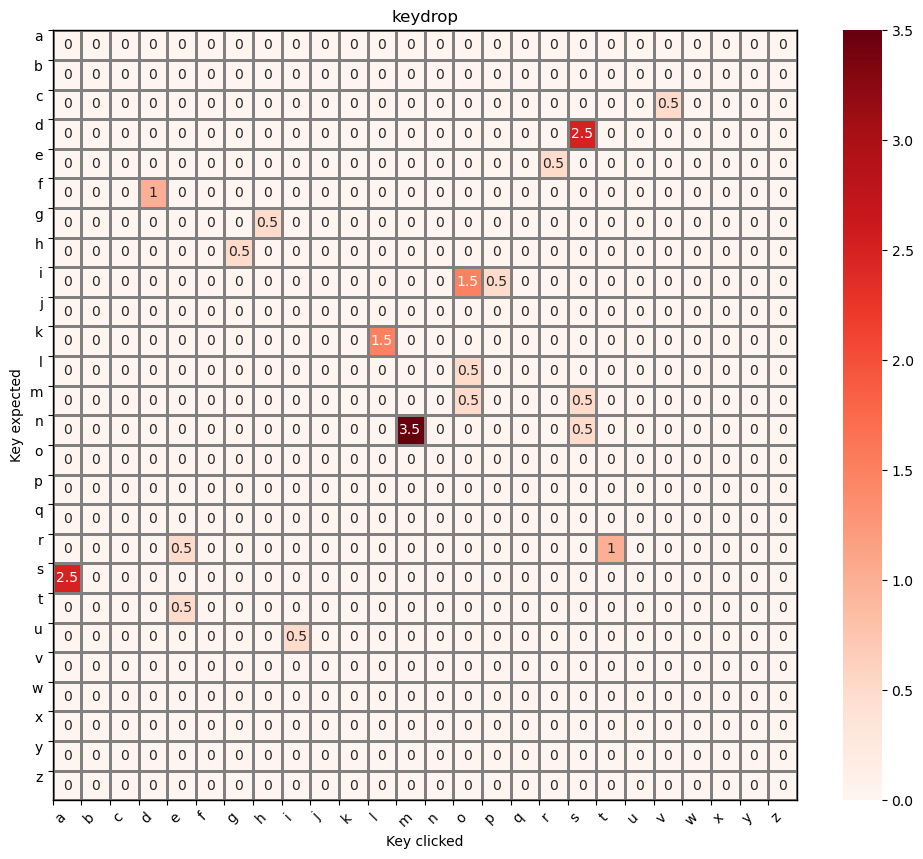

In [379]:
from utils import show_matrix
show_matrix(my_data[0], my_labels[0])
show_matrix(my_data[1], my_labels[1])


## Zadanie 4
Wracając do wyników wczytanych w zad 2. Jak zauważyłeś dane wejściowe (pierwsza wartość zwrócona z funkcji `process_data`) są macierzami, więc aby użyć je w klasyfikatorze należy je "spłaszczyć". W rezultacie powinieneś otrzymać listę wektorów z cechami.

> Podpowiedź: Użyj metody `flatten`.


In [380]:
example_data = [data_matrix.flatten() for data_matrix in example_data]
print(len(example_data))
display(example_data)

32


[array([ 0. ,  0. ,  0. ,  0.5,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         1. ,  0. ,  1.5,  0. ,  1.5,  1. ,  1. , 17. ,  1.5,  0. ,  0. ,
         1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
         1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0.5,  0.5,  0. ,  3.5,  0. ,  2. ,  0. ,
         0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  7. ,  0.5,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  2. ,  0. ,  0. ,  0. ,  0. , 10. ,  0. ,  0. ,
         0. ,  0. ,  0.5,  0. ,  0. ,  2. ,  0. ,  1. , 17.5,  0. ,  3. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
        32. ,  4.5,  1. ,  0. ,  0.5, 19. ,  0. ,  0. ,  1. ,  1. ,  0. ,
         0. ,  8.5,  0. ,  0. ,  4.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0.5,  0. ,  0. ,  0. , 


## Zadanie 5
Tak przygotowany zbiór danych podziel na zbiór uczący i zbiór testowy. Zadbaj aby w zbiorze testowym była parzysta liczba próbek (obserwacji). Użyj metody _losowania warstwowego_ (_stratified sampling_), która zachowa proporcje.

> Podpowiedź: Uzyj funkcji `from sklearn.model_selection import train_test_split`. Przykład:
> `X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=4, stratify=Y)`


In [381]:
from sklearn.model_selection import train_test_split
example_train_data, example_test_data, example_train_labels, example_test_labels = train_test_split(example_data, example_labels, test_size=4, stratify=example_labels)
display(example_test_data)
display(example_test_labels)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 3., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

array(['normal', 'keydrop', 'keydrop', 'normal'], dtype='<U7')


## Zadanie 6
Zaimplementuj klasyfikator kNN i przeprowadź klasyfikację. Wyświetl wynik [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score).

> Wersja dla leniwych: Skorzystaj z gotowej implementacji z biblioteki [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier).

In [382]:
from sklearn.metrics import accuracy_score

def euclidean_distance(data_a, data_b):
    result = 0
    for element_a, element_b in zip(data_a, data_b):
        result += np.square(element_a - element_b)
    return np.sqrt(result)

def keyboard_type(classifications):
    normal_count = 0
    for classification in classifications:
        normal_count += 1 if classification == 'normal' else (-1)
    return 'normal' if normal_count >= 0 else 'keydrop'

def KNN_classify(test_data, train_data, train_labels, k):
    test_labels = np.empty(0)
    for test_data_row in test_data:
        classifications = np.empty((0, 2)) # column 0: distance; column 1: classification; biggest distance is kept at the top
        for train_data_row, train_label in zip(train_data, train_labels):
            classification = np.array([[euclidean_distance(test_data_row, train_data_row), train_label]])
            if (len(classifications) < k): # fills up to k classifications initially 
                classifications = np.append(classifications, classification, axis=0)
                classifications = classifications[(-classifications[:, 0].astype(np.float32)).argsort()]
            elif (float(classification[0][0]) < float(classifications[0][0])): # smaller distance than the biggest one
                classifications[0] = classification[0]
                classifications = classifications[(-classifications[:, 0].astype(np.float32)).argsort()]
        classifications = classifications[:, -1]
        test_labels = np.append(test_labels, keyboard_type(classifications))
    return test_labels

print(f'classification accuracy: {accuracy_score(KNN_classify(example_test_data, example_train_data, example_train_labels, 4), example_test_labels)}')

classification accuracy: 1.0



## Zadanie 7
Punkty 5 i 6 wykonaj 100 razy i oblicz średni wynik klasyfikacji oraz odchylenie standardowe.

$s = \sqrt{\frac{1}{N} \sum_{i=0}^{N-1} (x_i - \overline{x})^2}$

gdzie $N$ to liczba wyników (w tym przypadku 100), $x_i$ to $i$-ty wynik, a $\overline{x}$ to średnia.


In [383]:
def classify_small_sample(data, labels, k):
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=4, stratify=labels)
    return accuracy_score(KNN_classify(test_data, train_data, train_labels, k), test_labels)

def standard_deviation(results):
    standard_deviation = 0
    average = np.average(results)
    for result in results:
        standard_deviation += np.square(result - average)
    standard_deviation /= len(results)
    standard_deviation = np.sqrt(standard_deviation)
    return round(standard_deviation, 2)

results = np.empty(0)
for i in range(100):
    results = np.append(results, classify_small_sample(example_data, example_labels, 4))
print(f'standard deviation: {standard_deviation(results)}')

standard deviation: 0.18



## Zadanie 8
Rozszerz zbiór danych o wyniki pozostałych studentów z grupy (prowadzący zajęcia dostarczy wyniki po otrzymaniu od wszystkich). Przeprowadź eksperyment ponownie i sprawdź czy wyniki klasyfikacji się zmieniły.

In [384]:
group_data, group_labels = process_data('group_results')
group_data = np.array(group_data)
group_labels = np.array(group_labels)

In [385]:
my_data = [data_matrix.flatten() for data_matrix in my_data]
group_data = [data_matrix.flatten() for data_matrix in group_data]

all_data = np.append(np.append(example_data, my_data, axis=0), group_data, axis=0)
all_labels = np.append(np.append(example_labels, my_labels, axis=0), group_labels, axis=0)

In [386]:
results = np.empty(0)
for i in range(100):
    results = np.append(results, classify_small_sample(all_data, all_labels, 4))
print(f'standard deviation: {standard_deviation(results)}')

standard deviation: 0.2
